## Types of gradient descent
### 1. Batch gradient descent 
Batch gradient descent sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch.<br>
While this batching provides computation efficiency, it can still have a long processing time for large training datasets as it still needs to store all of the data into memory. Batch gradient descent also usually produces a stable error gradient and convergence, but sometimes that convergence point isn’t the most ideal, finding the local minimum versus the global one.

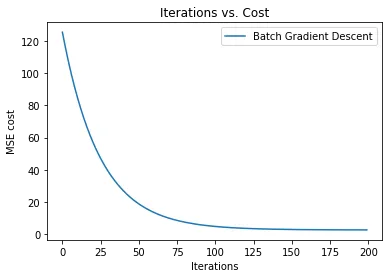

### 2. Stochastic gradient descent
Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. Since you only need to hold one training example, they are easier to store in memory. While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one.

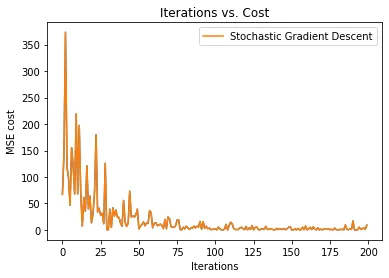

### 3. Mini-batch gradient descent 
Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent.

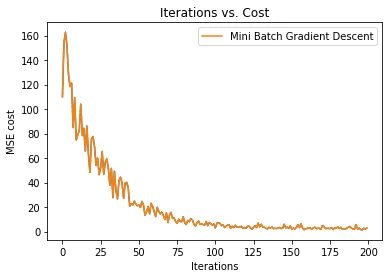

## Comparision

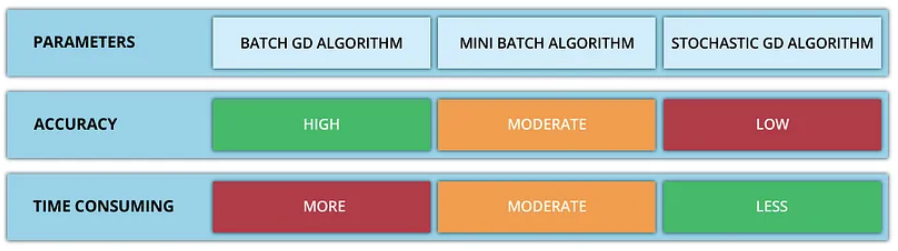

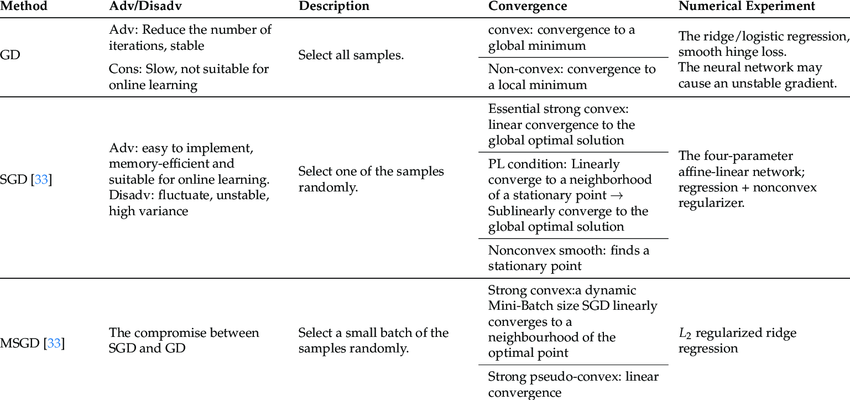

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
13,1100,2,40.0
1,2600,4,120.0
14,2250,3,101.0
11,2785,4,140.0
16,1180,3,48.0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      20 non-null     int64  
 1   bedrooms  20 non-null     int64  
 2   price     20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x = sx.fit_transform(df.drop('price',axis='columns'))
y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [5]:
x[:5],x.shape

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ]]),
 (20, 2))

In [6]:
y[:5],y.shape

(array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074]]),
 (20, 1))

## Batch Gradient Decent Implementation

In [7]:
def batch_gd(x, y_true, alpha = 0.5, epochs = 1000, batch_size = 32):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    w = w.reshape(1,-1)

    bias = 0
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_hat = np.dot(w, x.T) + bias
        # uncomment the line below if you'r using activation function on output layer. 
        # y_hat = sigmoid(y_hat) # don't forget to define activation function
        # error = log_loss(y_true,y_hat)
        
        y_hat = y_hat.reshape(-1,1)
        cost = np.mean(np.square(y_hat-y_true))
        
        n = len(y_true)     
        df_dw = (1/n)*np.dot(np.transpose(x),(y_hat-y_true))
        df_db = (1/n)*np.sum(y_hat-y_true) 
        
        w = w - (alpha * df_dw.T)
        bias = bias - (alpha * df_db)
        
        if i%10==0: # at every 10th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,bias,cost,cost_list,epoch_list

In [8]:
w, b, cost, cost_list, epoch_list = batch_gd(x, y, alpha = 0.5, epochs = 500)
w,b,cost

(array([[0.86570072, 0.27498879]]),
 -0.08858194799870317,
 0.0029489056704739567)

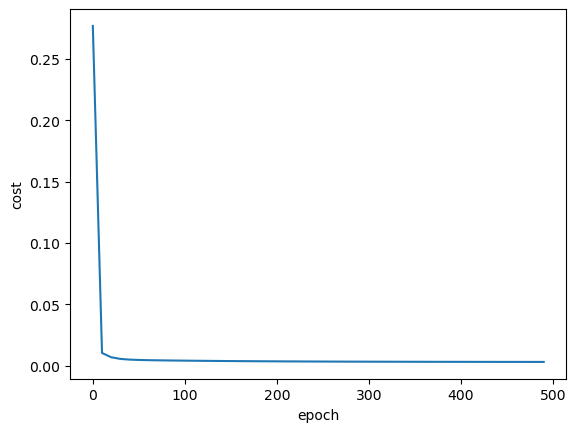

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x,y)
model.coef_,model.intercept_

(array([[0.92274563, 0.2021403 ]]), array([-0.07396696]))

## Stochastic Gradient Descent Implementation

In [11]:
def SGD(x, y_true, alpha = 0.5, epochs = 1000):
    
    w = np.ones(shape=(x.shape[1]))
    w = w.reshape(1,-1)
    bias = 0
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = np.random.randint(x.shape[0]-1)
        #print(random_index,end=" ")
        random_x = x[random_index]
        random_y = y_true[random_index]
        y_predict = np.dot(w,random_x) + bias
        cost = np.square(random_y-y_predict)
        
        n = len(y_true)
        df_dw = 1/n*(random_x*(y_predict-random_y))
        df_db = 1/n*((y_predict-random_y)**2)
        w = w - (alpha * df_dw)
        bias = bias - (alpha * df_db)
        
        if i%10==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
    return w,bias,cost,cost_list,epoch_list

In [12]:
w,b,cost,cost_list,epoch_list = SGD(x, y, alpha = 0.5, epochs = 1000)
w,b,cost

(array([[0.751198  , 0.69145752]]), array([-0.28308015]), array([0.0054241]))

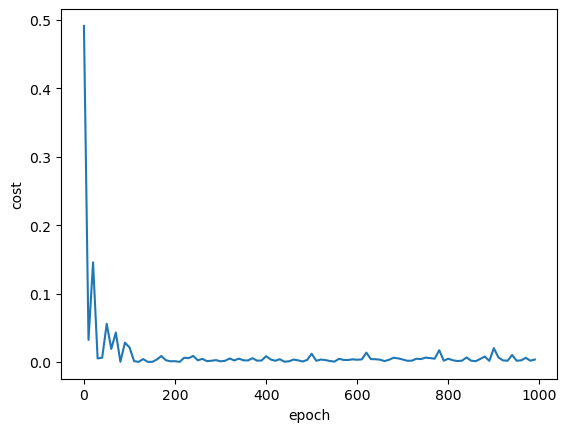

In [13]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [43]:
def minibatchgd(x_true, y_true, alpha = 0.5, epochs = 1000, batch_size = 10):
    number_of_features = x_true.shape[1]
    w = np.ones(shape=(number_of_features))
    w = w.reshape(1,-1)

    bias = 0
    cost_list = []
    epoch_list = []
    batch = 0
    lastindex = len(y_true)
    
    total_samples = x_true.shape[0]
    if batch_size > total_samples:
        batch_size = total_samples
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = x_true[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            
            x = X_tmp[j:j+batch_size]
            y = y_tmp[j:j+batch_size]
            
            y_hat = np.dot(w, x.T) + bias
            # uncomment the line below if you'r using activation function on output layer. 
            # y_hat = sigmoid(y_hat) # don't forget to define activation function
            # error = log_loss(y_true,y_hat)

            y_hat = y_hat.reshape(-1,1)
            cost = np.mean(np.square(y_hat-y))

            n = len(y)     
            df_dw = (1/n)*np.dot(np.transpose(x),(y_hat-y))
            df_db = (1/n)*np.sum(y_hat-y) 

            w = w - (alpha * df_dw.T)
            bias = bias - (alpha * df_db)
            
        if i%1==0: # at every 10th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,bias,cost,cost_list,epoch_list

In [44]:
w,b,cost,cost_list,epoch_list = minibatchgd(x, y, alpha = 0.5, epochs = 1500)
w,b,cost

(array([[0.91994927, 0.20011159]]), -0.07659787031244639, 0.004112502130659896)

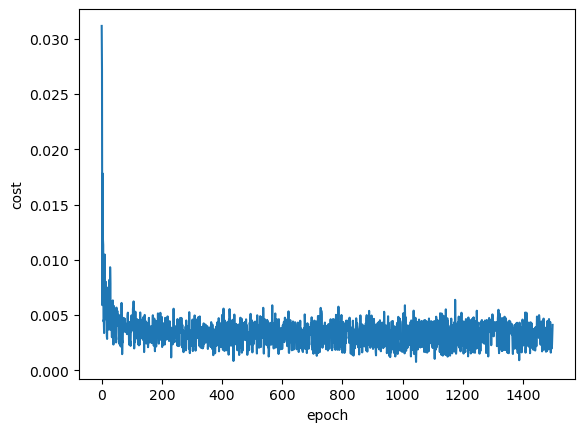

In [45]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)